dict_values([0.0, 0.0, 0.0, 0.0, 0.0, 0.999, 0.0, 0.0])
dict_keys(['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise'])
neutral
550
323
793
793


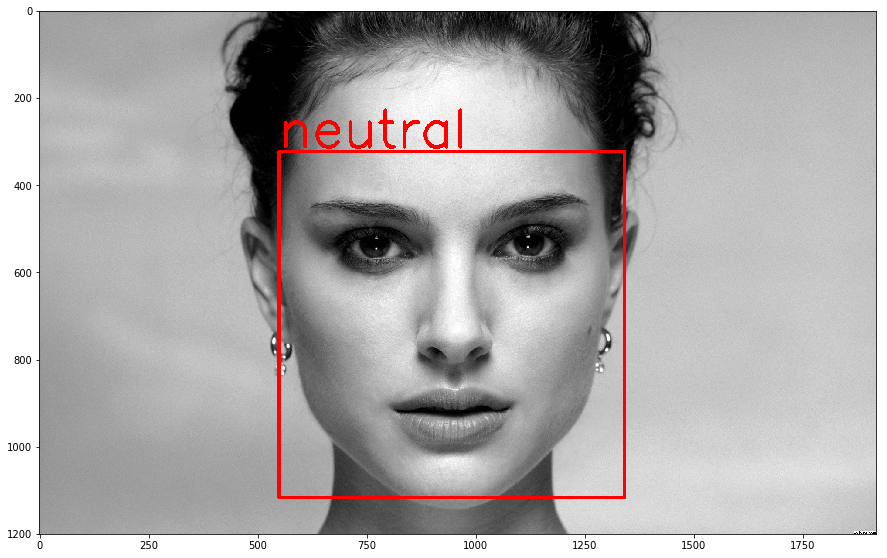

In [3]:
import time 
import requests
import cv2
import operator
import numpy as np
from __future__ import print_function

# Import library to display results
import matplotlib.pyplot as plt
%matplotlib inline 
# Display images within Jupyter

# Variables

_url = 'https://eastasia.api.cognitive.microsoft.com/face/v1.0/detect'
_key = '09582a17ca0045f3856e19e0e597bfba' #Here you have to paste your primary key
_maxNumRetries = 10

def processRequest( json, data, headers, params ):

    """
    Helper function to process the request to Project Oxford

    Parameters:
    json: Used when processing images from its URL. See API Documentation
    data: Used when processing image read from disk. See API Documentation
    headers: Used to pass the key information and the data type request
    """

    retries = 0
    result = None

    while True:

        response = requests.request( 'post', _url, json = json, data = data, headers = headers, params = params )

        if response.status_code == 429: 

            print( "Message: %s" % ( response.json()['error']['message'] ) )

            if retries <= _maxNumRetries: 
                time.sleep(1) 
                retries += 1
                continue
            else: 
                print( 'Error: failed after retrying!' )
                break

        elif response.status_code == 200 or response.status_code == 201:

            if 'content-length' in response.headers and int(response.headers['content-length']) == 0: 
                result = None 
            elif 'content-type' in response.headers and isinstance(response.headers['content-type'], str): 
                if 'application/json' in response.headers['content-type'].lower(): 
                    result = response.json() if response.content else None 
                elif 'image' in response.headers['content-type'].lower(): 
                    result = response.content
        else:
            print( "Error code: %d" % ( response.status_code ) )
            print( "Message: %s" % ( response.json()['error']['message'] ) )

        break
        
    return result

def renderResultOnImage( result, img ):
    
    """Display the obtained results onto the input image"""
    
    for currFace in result:
        faceRectangle = currFace['faceRectangle']
        cv2.rectangle( img,(faceRectangle['left'],faceRectangle['top']),
                           (faceRectangle['left']+faceRectangle['width'], faceRectangle['top'] + faceRectangle['height']),
                       color = (255,0,0), thickness = 5 )


    for currFace in result:
        faceRectangle = currFace['faceRectangle']
        faceAttributes=currFace['faceAttributes']
        listvalue=list(currFace['faceAttributes'].values())
        
        emotion = max(listvalue[0].items(), key=operator.itemgetter(1))[0]
        print(listvalue[0].values())
        print(listvalue[0].keys())
        print (emotion)
        print(faceRectangle['left'])
        print(faceRectangle['top'])
        print(faceRectangle['height'])
        print(faceRectangle['width'])

        image = Image.open(fd)
        rect=(faceRectangle['left'],faceRectangle['top'],faceRectangle['width'],faceRectangle['height'])
        crop = image.crop(rect)
        image.show()
        
        textToWrite = "%s" % ( emotion )
        cv2.putText( img, textToWrite, (faceRectangle['left'],faceRectangle['top']-10),cv2.FONT_HERSHEY_SIMPLEX ,4, (255,0,0),8)

# Request parameters.
params = {
 
    'returnFaceId': 'true',
 
    'returnFaceLandmarks': 'false',
 
    'returnFaceAttributes': 'emotion',
 
}

# URL direction to image
urlImage = 'http://all4desktop.com/data_images/original/4242401-face.jpg'

# Face detection parameters
params = { 'returnFaceAttributes': 'emotion', 
           'returnFaceLandmarks': 'true'} 

headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
headers['Content-Type'] = 'application/json' 

json = { 'url': urlImage }

data = None

result = processRequest( json, data, headers, params )

if result is not None:
    # Load the original image, fetched from the URL
    arr = np.asarray( bytearray( requests.get( urlImage ).content ), dtype=np.uint8 )
    img = cv2.cvtColor( cv2.imdecode( arr, -1 ), cv2.COLOR_BGR2RGB )
    
    faceRectangle = currFace['faceRectangle']
    rect=(faceRectangle['left'],faceRectangle['top'],faceRectangle['width'],faceRectangle['height'])
    crop = img.crop(rect)
    
    renderResultOnImage( result, img )

    ig, ax = plt.subplots(figsize=(15, 20))
    ax.imshow( img )